In [1]:
from directories import *
image_size = (128, 128)
mask_size = (128, 128)

train_images_size = len(train_images)
batch_size = 4
steps_per_epoch = train_images_size // batch_size

validation_images_size = len(validation_images)
validation_batch_size = 1
validation_steps = validation_images_size // validation_batch_size

learning_rate = 6e-4
epochs = 20

In [2]:
from load import MakeDataset, Clahe_Dataset, Clahe_HSV_Dataset
train_dataset = Clahe_Dataset(train_images, train_masks, image_size, mask_size, train_images_size, batch_size)
validation_dataset = Clahe_Dataset(validation_images, validation_masks, image_size, mask_size, validation_images_size, validation_batch_size)

2022-11-27 13:19:49.497126: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-27 13:19:52.117894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-27 13:19:52.193619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-27 13:19:52.194079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-27 13:19:52.194932: I t

In [3]:
#with strategy.scope():
from models import *
from load import load_saved_model

#model = load_saved_model("regularization_1e-3_noclahe_4_2200_1e-4_100.h5")
model = batch_normalization_model(image_size)

In [4]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 X-0-0-1 (Conv2D)               (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 X-0-0-2 (Conv2D)               (None, 128, 128, 64  36928       ['X-0-0-1[0][0]']                
                                )                                                             

In [4]:
from tensorflow.keras.optimizers import Adam
from metrics import jacc_loss, dice_coef, jacc_coef, acc, mean_IoU, sensitivity, specificity, discrete_jacc
model.compile(optimizer = Adam(learning_rate=learning_rate), loss = jacc_loss, metrics = [acc, dice_coef, jacc_coef, mean_IoU, sensitivity, specificity, discrete_jacc])

In [5]:
history = model.fit(
    train_dataset, 
    batch_size=batch_size, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    validation_data=validation_dataset, 
    validation_batch_size=validation_batch_size,
    validation_steps=validation_steps
)

Epoch 1/30


2022-11-27 13:19:57.524412: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-27 13:19:58.885979: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-27 13:19:59.118951: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-27 13:19:59.119145: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-27 13:19:59.272663: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

500/500 [==============================] - 70s 124ms/step - loss: 0.5944 - binary_accuracy: 0.8985 - dice_coef: 0.3640 - jacc_coef: 0.4056 - mean_IoU: 0.7007 - sensitivity: 0.8254 - specificity: 0.9362 - discrete_jacc: 0.5985 - val_loss: 0.6876 - val_binary_accuracy: 0.9077 - val_dice_coef: 0.3115 - val_jacc_coef: 0.3124 - val_mean_IoU: 0.7368 - val_sensitivity: 0.7986 - val_specificity: 0.9553 - val_discrete_jacc: 0.5737
Epoch 2/30
500/500 [==============================] - 61s 121ms/step - loss: 0.5531 - binary_accuracy: 0.9206 - dice_coef: 0.3833 - jacc_coef: 0.4469 - mean_IoU: 0.7476 - sensitivity: 0.8519 - specificity: 0.9561 - discrete_jacc: 0.6597 - val_loss: 0.6622 - val_binary_accuracy: 0.9027 - val_dice_coef: 0.3340 - val_jacc_coef: 0.3378 - val_mean_IoU: 0.7575 - val_sensitivity: 0.8992 - val_specificity: 0.9298 - val_discrete_jacc: 0.5857
Epoch 3/30
500/500 [==============================] - 61s 122ms/step - loss: 0.5133 - binary_accuracy: 0.9333 - dice_coef: 0.3996 - jacc_

In [7]:
from utils import plot_graphs, save_dict_as_json, load_multiple

In [9]:
save_dict_as_json(history.history, "batch_noclahe_4_2000_3e-4_30")
model.save("batch_noclahe_4_2000_3e-4_30.h5")

In [14]:
history = load_multiple("batch_noclahe_4_2000_6e-4_30.json")

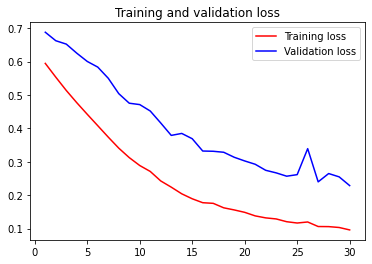

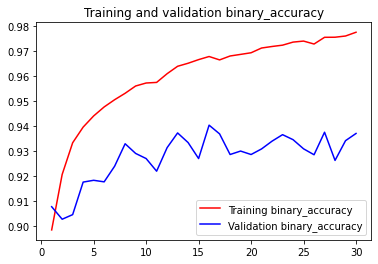

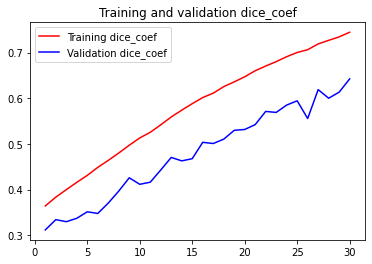

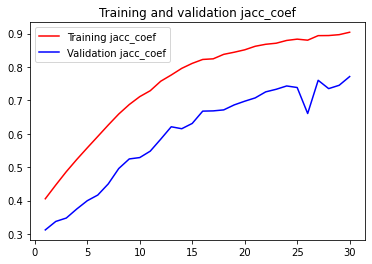

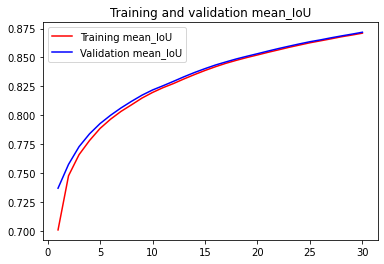

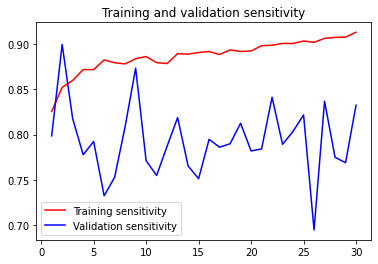

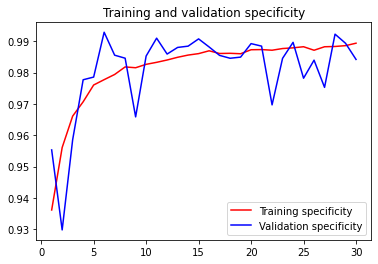

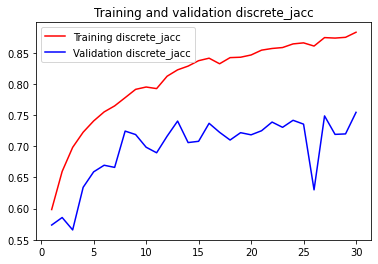

Min/Max Validation val_loss 0.22853951156139374 0.6876317262649536
Min/Max Validation val_binary_accuracy 0.9027368426322937 0.9403076171875
Min/Max Validation val_dice_coef 0.3114916980266571 0.6424098014831543
Min/Max Validation val_jacc_coef 0.3123685121536255 0.7714605927467346
Min/Max Validation val_mean_IoU 0.7368273138999939 0.8718319535255432
Min/Max Validation val_sensitivity 0.6950313448905945 0.8992420434951782
Min/Max Validation val_specificity 0.9298242330551147 0.9928619265556335
Min/Max Validation val_discrete_jacc 0.565825879573822 0.7545201778411865


In [8]:
plot_graphs(history.history, smooth=False)

In [11]:
test_dataset = Clahe_Dataset(test_images, test_masks, image_size, mask_size, len(test_images), batch_size)

In [12]:
test_loss, test_acc, test_dice, test_jacc, *_ = model.evaluate(test_dataset, steps=len(test_images))

600/600 [==============================] - 63s 101ms/step - loss: 0.2337 - binary_accuracy: 0.9280 - dice_coef: 0.8240 - jacc_coef: 0.7663 - mean_IoU: 0.8890 - sensitivity: 0.8004 - specificity: 0.9784 - discrete_jacc: 0.7147
test loss: 0.2336987555027008
test acc: 0.9280353784561157
test dice: 0.8239870667457581
test jacc: 0.7663010358810425


1/1 [==============================] - 1s 1s/step
1.0


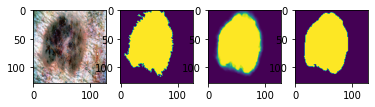

1/1 [==============================] - 0s 31ms/step
1.0


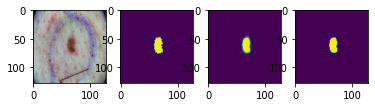

1/1 [==============================] - 0s 33ms/step
1.0


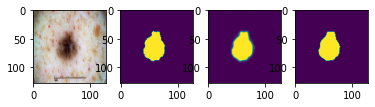

1/1 [==============================] - 0s 33ms/step
1.0


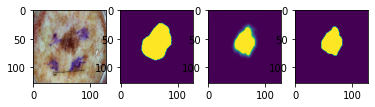

1/1 [==============================] - 0s 31ms/step
1.0


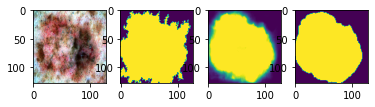

In [13]:
import matplotlib.pyplot as plt
test_dataset = Clahe_Dataset(test_images, test_masks, image_size, mask_size,  len(test_images), batch_size=1)
for image, mask in test_dataset.take(5).as_numpy_iterator():
  prediction = model.predict(image)
  f, ax = plt.subplots(1,4)
  ax[0].imshow(image[0])
  ax[1].imshow(mask[0].squeeze(axis=2))
  ax[2].imshow(prediction[0].squeeze(axis=2))
  ax[3].imshow(prediction[0].squeeze(axis=2).round())
  print(max(prediction[0].squeeze(axis=2).flatten()))
  plt.show()